<a href="https://colab.research.google.com/github/gustavol3ma/PO/blob/main/P_O(aula).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as distancia_euclidiana
from itertools import permutations as permutation
!pip install deap
from deap import creator, base, tools, algorithms
import numpy as np
import networkx as nx


In [2]:
origem = (0,0)
destino =(4,4)

enderecos = [(2,1),(2,2),(8,3),(5,3)]

In [3]:
rota = [origem] + enderecos + [destino]

In [4]:
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

Distância percorrida: 13.73


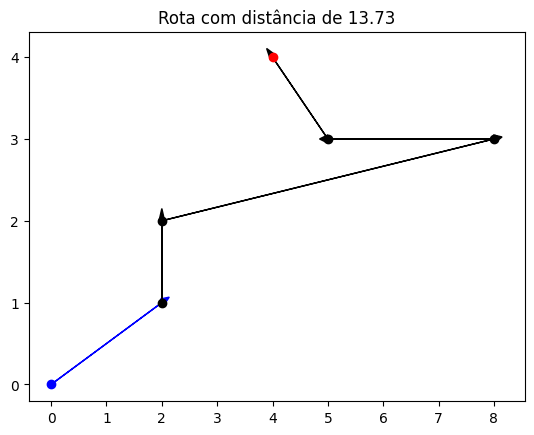

In [5]:
tamanho_rota = len(rota)
distancia_percorrida = 0

for i in range(tamanho_rota):
  x,y = rota[i]
  cor= 'black'
  if i == 0:
    cor = 'blue'
  elif i == tamanho_rota -1:
    cor = 'red'

  plt.scatter(x,y ,color=cor)
  if i < tamanho_rota -1:
    x1,y1 = rota[i+1]
    dx = x1 - x
    dy = y1 - y
    plt.arrow(x,y,dx,dy , color=cor,head_width=0.1)
    distancia_percorrida += distancia_euclidiana(rota[i],rota[i+1])
plt.title(f'Rota com distância de {distancia_percorrida:.2f}')
print(f'Distância percorrida: {distancia_percorrida:.2f}')
plt.show()

In [6]:
def desenhar_rota(rota):

  tamanho_rota = len(rota)
  distancia_percorrida = 0

  for i in range(tamanho_rota):
    x,y = rota[i]
    cor= 'black'
    if i == 0:
      cor = 'blue'
    elif i == tamanho_rota -1:
      cor = 'red'

    plt.scatter(x,y ,color=cor)
    if i < tamanho_rota -1:
      x1,y1 = rota[i+1]
      dx = x1 - x
      dy = y1 - y
      plt.arrow(x,y,dx,dy , color=cor,head_width=0.1)
      distancia_percorrida += distancia_euclidiana(rota[i],rota[i+1])
  plt.title(f'Rota com distância de {distancia_percorrida:.2f}')
  print(f'Distância percorrida: {distancia_percorrida:.2f}')
  plt.show()

Distância percorrida: 14.56


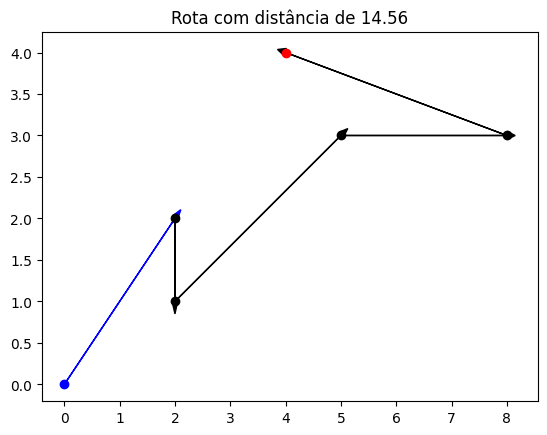

In [7]:
origem = (0,0)
destino =(4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3)]
rota = [origem] + enderecos + [destino]
desenhar_rota(rota)

In [8]:
def calcular_distancia_rota(rota):
  distancia=0
  tamanha_rota=len(rota)
  for i in range(tamanho_rota):
    if i < tamanho_rota -1:
      distancia += distancia_euclidiana(rota[i],rota[i+1])
  return distancia

Melhor rota: None
Menor distância: 13.52145126328583
Distância percorrida: 13.52


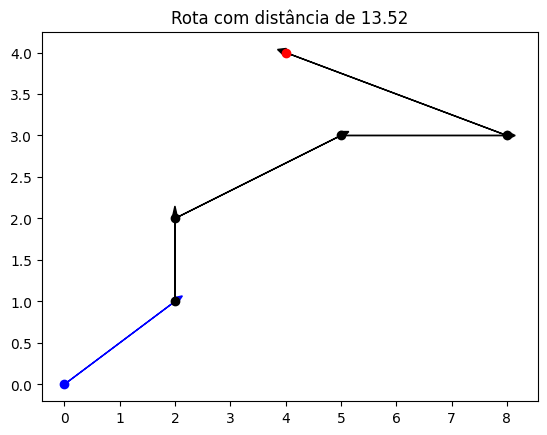

In [9]:
menor_distancia = float('inf')
melhor_rota = None
for permutacao in permutation(enderecos):
  rota = [origem] + list(permutacao) + [destino]
  distancia_rota = calcular_distancia_rota(rota)

  if distancia_rota < menor_distancia:
    menor_distancia = distancia_rota
    menor_rota = rota

print(f'Melhor rota: {melhor_rota}')
print(f'Menor distância: {menor_distancia}')
desenhar_rota(menor_rota)

In [10]:
def forca_bruta(origem,destino,enderecos):
  menor_distancia = float('inf')
  melhor_rota = None
  for permutacao in permutation(enderecos):
    rota = [origem] + list(permutacao) + [destino]
    distancia_rota = calcular_distancia_rota(rota)

    if distancia_rota < menor_distancia:
      menor_distancia = distancia_rota
      menor_rota = rota
  return menor_rota,menor_distancia

In [11]:
'''
Vai demorar para fazer a execução, pois na lista de endereços existem 10 pares. Logo,
será preciso um poder computacional maior para realizar os cálculos da melhor rota.


origem = (0,0)
destino =(4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]

menor_rota,menor_distancia = forca_bruta(origem,destino,enderecos)
desenhar_rota(menor_rota)

'''



'\nVai demorar para fazer a execução, pois na lista de endereços existem 10 pares. Logo,\nserá preciso um poder computacional maior para realizar os cálculos da melhor rota.\n\n\norigem = (0,0)\ndestino =(4,4)\n\nenderecos = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]\n\nmenor_rota,menor_distancia = forca_bruta(origem,destino,enderecos)\ndesenhar_rota(menor_rota)\n\n'

In [12]:
origem = (0,0)
destino =(4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3)]

In [13]:
def vizinho_mais_proximo(origem,destino,enderecos):

  ponto_atual = origem
  enderecos_restantes = enderecos.copy()

  distancia_percorrida = 0
  menor_rota = [ponto_atual]


  while enderecos_restantes:

    #Encontrar o ponto mais prox. do ponto atual
    menor_distancia = float('inf')
    ponto_mais_proximo = None
    for endereco in enderecos_restantes:
      distancia = distancia_euclidiana(ponto_atual,endereco)
      if distancia < menor_distancia:
        menor_distancia = distancia
        ponto_mais_proximo = endereco

    #Remover esse ponto da lista de enderecos
    enderecos_restantes.remove(ponto_mais_proximo)
    #Adicionar esse ponto na menor rota
    menor_rota.append(ponto_mais_proximo )
    #Atualizar a distância percorrida
    distancia_percorrida = distancia_percorrida + menor_distancia
    #Atualizar ponto atual
    ponto_atual = ponto_mais_proximo

  menor_rota.append(destino)
  distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual,endereco)

  return menor_rota,distancia_percorrida

Distância percorrida: 20.45


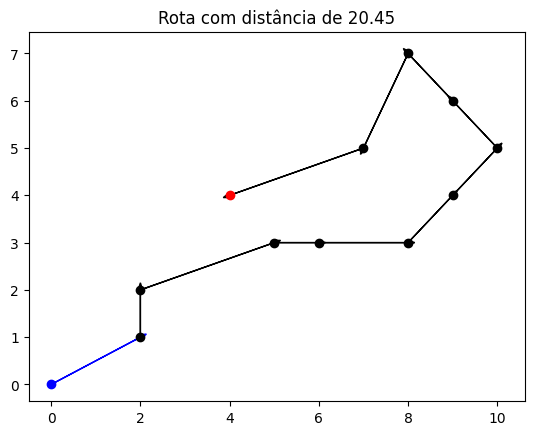

In [14]:
origem1= (0,0)
destino1 =(4,4)

enderecos1 = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]

menor_rota , menor_distancia = vizinho_mais_proximo(origem1,destino1,enderecos1)
desenhar_rota(menor_rota)


In [15]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,1),(2,2),(5,3),(8,3)]
individuo = (0,1,2,3)

In [16]:
def avaliar(individuo,origem,enderecos,destino):
  rota = [origem]
  for i in individuo:
    rota.append(enderecos[i])
  rota.append(destino)

  distancia_percorrida = calcular_distancia_rota(rota)

  return distancia_percorrida,

In [17]:
tam_populacao_inicial = 100
prob_cruzamento = 0.7
prob_mutacao = 0.1
numero_geracoes = 100


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individuo", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("Genes", np.random.permutation, len(enderecos))
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
populacao = toolbox.Populacao(n=tam_populacao_inicial)


toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

algoritmo = algorithms.eaSimple(populacao,
                                toolbox,
                                cxpb=prob_cruzamento,
                                mutpb=prob_cruzamento,
                                ngen=numero_geracoes,
                                verbose=False)

melhor_ind = tools.selBest(populacao, 1)[0]


In [18]:
melhor_ind

[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

Distância percorrida: 13.52


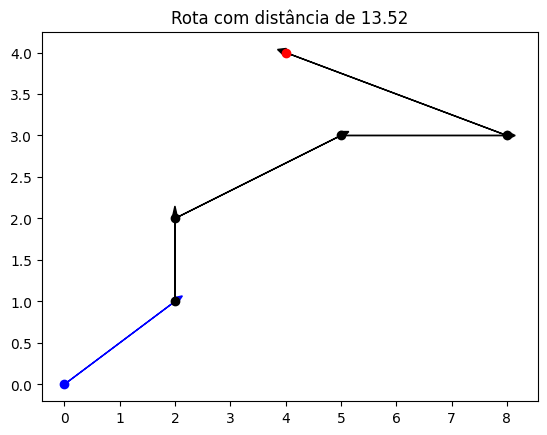

In [19]:
menor_rota = [origem]
for i in melhor_ind:
  menor_rota.append(enderecos[i])
menor_rota.append(destino)

desenhar_rota(menor_rota)

In [20]:
def algoritmos_geneticos(origem,destino,enderecos, tam_populacao_inicial=100
                       ,prob_cruzamento = 0.7,prob_mutacao = 0.1,numero_geracoes = 500 ):

  creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
  creator.create("Individuo", list, fitness=creator.FitnessMin)

  toolbox = base.Toolbox()
  toolbox.register("Genes", np.random.permutation, len(enderecos))
  toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

  toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
  populacao = toolbox.Populacao(n=tam_populacao_inicial)


  toolbox.register("mate", tools.cxPartialyMatched)
  toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
  toolbox.register("select", tools.selTournament, tournsize=3)
  toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

  algoritmo = algorithms.eaSimple(populacao,
                                  toolbox,
                                  cxpb=prob_cruzamento,
                                  mutpb=prob_cruzamento,
                                  ngen=numero_geracoes,
                                  verbose=False)

  melhor_ind = tools.selBest(populacao, 1)[0]

  menor_rota =[origem]
  for i in melhor_ind:
    menor_rota.append(enderecos[i])
  menor_rota.append(destino)

  distancia_percorrida = calcular_distancia_rota(menor_rota)

  return menor_rota,distancia_percorrida

/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Distância percorrida: 25.94


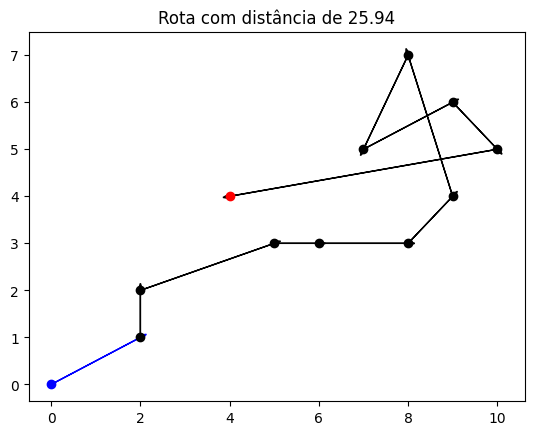

In [21]:
origem1= (0,0)
destino1 =(4,4)

enderecos1 = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]

melhor_rota_geral = None
menor_distancia_geral = float('inf')

for i in range(10):
  menor_rota,menor_distancia = algoritmos_geneticos(origem1,destino1,enderecos1)

  if menor_distancia < menor_distancia_geral:
    menor_distancia_geral = menor_distancia
    melhor_rota_geral = menor_rota



if melhor_rota_geral is not None:
  desenhar_rota(melhor_rota_geral)
else:
  print("Nenhuma rota melhor foi encontrada durante as iterações.")

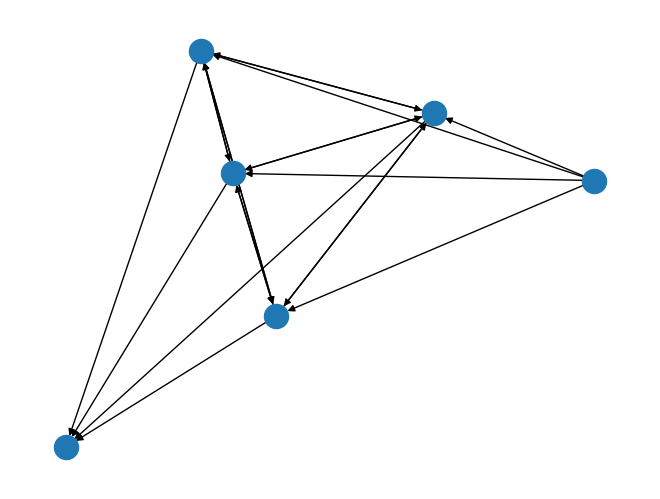

In [22]:
origem = (0,0)
destino = (4,4)


enderecos = [(2,1),(2,2),(8,3),(5,3)]

G = nx.DiGraph()

G.add_node('origem',local=origem)
G.add_node('destino',local=destino)

for i, endereco in enumerate(enderecos):
  G.add_node(i,local=endereco)

for i, endereco1 in enumerate(enderecos):
  G.add_edge('origem', i , distancia = distancia_euclidiana(origem,endereco1))
  G.add_edge(i,'destino', distancia = distancia_euclidiana(endereco1,destino))
  for j, endereco2 in enumerate(enderecos):
    if i!=j:
      G.add_edge(i,j,distancia=distancia_euclidiana(endereco1,endereco2))
nx.draw(G)

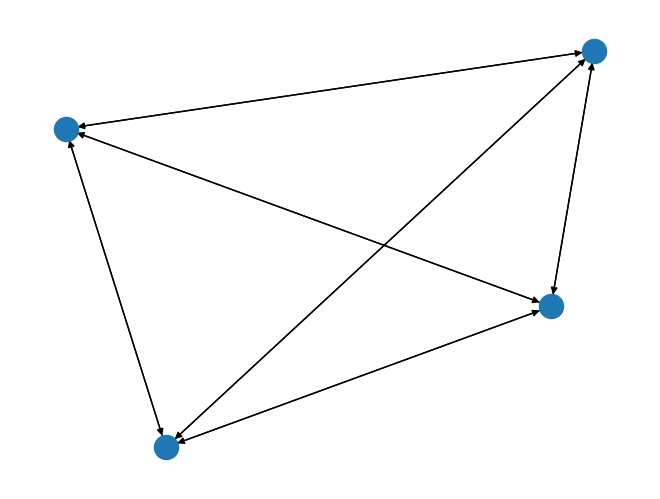

In [23]:
G_teste = nx.DiGraph()
for i, endereco in enumerate(enderecos):
  G_teste.add_node(i,local=endereco)

for i, endereco1 in enumerate(enderecos):
  for j, endereco2 in enumerate(enderecos):
    if i!=j:
      G_teste.add_edge(i,j,weight=distancia_euclidiana(endereco1,endereco2))
nx.draw(G_teste)

In [24]:
tsp = nx.approximation.traveling_salesman_problem(G_teste,weight='weight')
print(tsp)

[1, 0, 2, 3, 1]


In [25]:


def criar_grafo(origem,destino,enderecos,flag_conexo=False):
  G = nx.DiGraph()

  G.add_node('origem',local=origem)
  G.add_node('destino',local=destino)

  for i, endereco in enumerate(enderecos):
    G.add_node(i,local=endereco)

  for i, endereco1 in enumerate(enderecos):
    G.add_edge('origem', i , weight = distancia_euclidiana(origem,endereco1))
    G.add_edge(i,'destino', weight = distancia_euclidiana(endereco1,destino))
    for j, endereco2 in enumerate(enderecos):
      if i!=j:
        G.add_edge(i,j,weight=distancia_euclidiana(endereco1,endereco2))
  nx.draw(G)

  if flag_conexo==True:
    G.add_edge('destino' , 'origem', weight=0)
  return G

def algoritmo_em_grafos(origem,destino,enderecos,flag_conexo=True):
  G = criar_grafo(origem,destino,enderecos,flag_conexo)
  ciclo= nx.approximation.traveling_salesman_problem(G,weight='weight',cycle=False)

  #ciclo=[3,2,'destino','origem',0,1] #Melhor Ciclo
  indice_origem = ciclo.index('origem')
  print(indice_origem)
  ciclo_rotacionado = ciclo[indice_origem:] + ciclo[:indice_origem]
  print(ciclo_rotacionado)
  ciclo_rotacionado.remove('origem')
  ciclo_rotacionado.remove('destino')

  melhor_rota = [origem]

  for i in ciclo_rotacionado:
    melhor_rota.append(enderecos[i])
  melhor_rota.append(destino)

  distancia_percorrida = calcular_distancia_rota(melhor_rota)
  return melhor_rota,distancia_percorrida




1
['origem', 0, 1, 3, 2, 'destino']
[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)]
13.52145126328583
Distância percorrida: 13.52


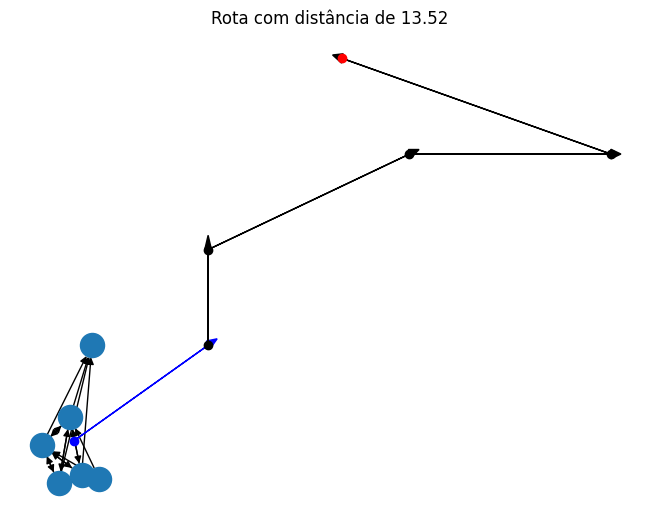

In [26]:
origem = (0,0)
destino = (4,4)


enderecos = [(2,1),(2,2),(8,3),(5,3)]


melhor_rota, distancia_percorrida = algoritmo_em_grafos(origem,destino,enderecos)
print(melhor_rota)
print(distancia_percorrida)
desenhar_rota(melhor_rota)

6

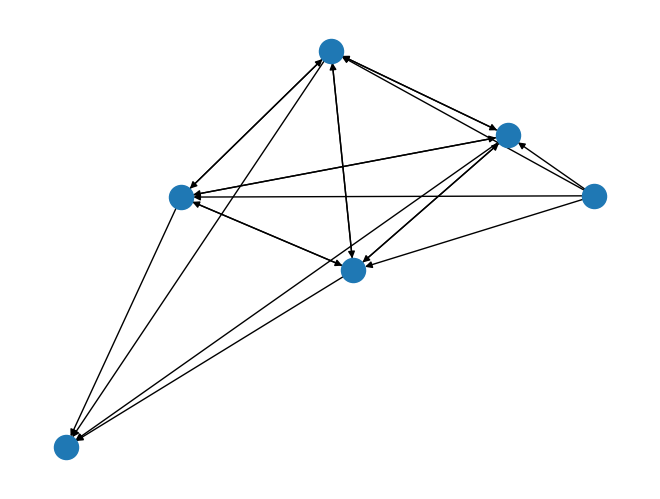

In [27]:
G = criar_grafo(origem,destino,enderecos)
G.get_edge_data(0,3)['weight']
n=G.number_of_nodes()
n

In [28]:
!pip install ortools

In [29]:
from ortools.linear_solver import pywraplp

In [30]:
modelo = pywraplp.Solver.CreateSolver('SCIP')

In [31]:
x = {}
for i,j in G.edges():
  x[(i,j)] = modelo.BoolVar(name=f'x[{i,j}]')
u={}
for i in G.nodes():
  u[i] = modelo.NumVar(lb = 1.0 , ub = n, name=f'u[{i}]')

In [32]:
modelo.Minimize((sum(G.get_edge_data(i,j)['weight']*x[i,j]for i,j in G.edges())))

In [33]:
for i in G.nodes():
  if i!='destino':
    modelo.Add(sum(x[i,j]for j in G.successors(i))==1)

  if i!='origem':
    modelo.Add(sum(x[j,i]for j in G.predecessors(i))==1)
for i,j in G.edges():
  modelo.Add(u[i]-u[j] + n*x[i,j]<= n -1)

In [34]:
status = modelo.Solve()

In [35]:
melhor_rota = []
distancia_percorrida =float('inf')

status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótimo' , pywraplp.Solver.FEASIBLE:'Viável'}

if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
  print('Solução ótima!')
  distancia_percorrida=modelo.Objective().Value()

  melhor_rota = [0]*n
  for i in G.nodes():
    indice = round(u[i].solution_value())-1
    melhor_rota[indice] = G.nodes[i]['local']

print(melhor_rota)


Solução ótima!
[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)]


Distância percorrida: 13.52


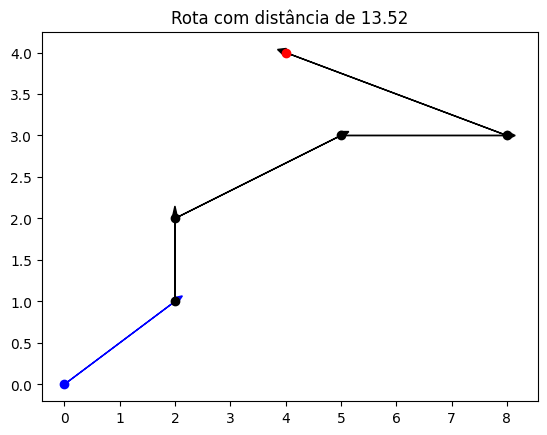

In [36]:
desenhar_rota(melhor_rota)

In [37]:
def modelo_matematico(origem,destino,enderecos):
  G = criar_grafo(origem,destino,enderecos)
  n=G.number_of_nodes()

  modelo = pywraplp.Solver.CreateSolver('SCIP')
  modelo.SetTimeLimit(60*10000)

  #Variaveis de decisao
  x = {}
  for i,j in G.edges():
    x[(i,j)] = modelo.BoolVar(name=f'x[{i,j}]')
    u={}
  for i in G.nodes():
    u[i] = modelo.NumVar(lb = 1.0 , ub = n, name=f'u[{i}]')

  #Funcao objetivo

  modelo.Minimize((sum(G.get_edge_data(i,j)['weight']*x[i,j]for i,j in G.edges())))
  for i in G.nodes():
    if i!='destino':
      modelo.Add(sum(x[i,j]for j in G.successors(i))==1)

    if i!='origem':
      modelo.Add(sum(x[j,i]for j in G.predecessors(i))==1)
  for i,j in G.edges():
    modelo.Add(u[i]-u[j] + n*x[i,j]<= n -1)

   #Resolução
  status = modelo.Solve()

  #Formatacao dos resultados

  melhor_rota = []
  distancia_percorrida =float('inf')

  status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótimo' , pywraplp.Solver.FEASIBLE:'Viável'}

  if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print('Solução ótima!')
    distancia_percorrida=modelo.Objective().Value()

    melhor_rota = [0]*n
    for i in G.nodes():
      indice = round(u[i].solution_value())-1
      melhor_rota[indice] = G.nodes[i]['local']
  return melhor_rota, distancia_percorrida

In [38]:
origem= (0,0)
destino =(4,4)

endereco = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5),(9,1),(11,10),(3,6),(10,10)]

Solução ótima!
Distância percorrida: 35.14


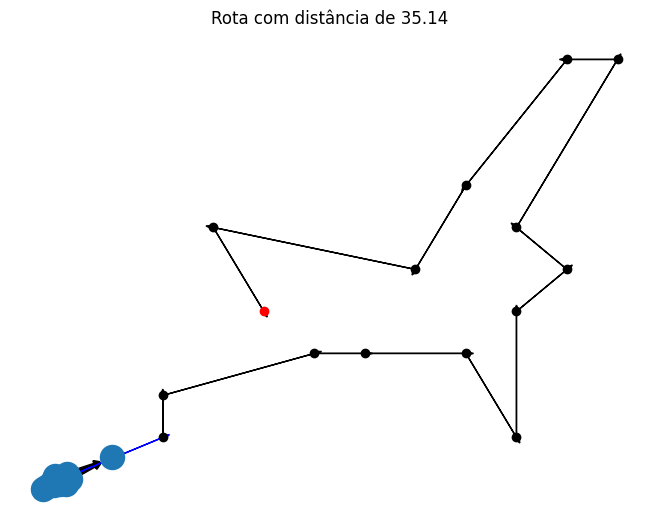

In [39]:
melhor_rota , distancia_percorrida = modelo_matematico(origem,destino,endereco)
desenhar_rota(melhor_rota)

In [20]:
def modelo_matematico_com_heuristica(origem,destino,enderecos):
  import networkx as nx # Import networkx inside the function
  from scipy.spatial.distance import euclidean as distancia_euclidiana # Import distancia_euclidiana inside the function
  from ortools.linear_solver import pywraplp # Import pywraplp inside the function

  def criar_grafo(origem,destino,enderecos,flag_conexo=False):
    G = nx.DiGraph()

    G.add_node('origem',local=origem)
    G.add_node('destino',local=destino)

    for i, endereco in enumerate(enderecos):
      G.add_node(i,local=endereco)

    for i, endereco1 in enumerate(enderecos):
      G.add_edge('origem', i , weight = distancia_euclidiana(origem,endereco1))
      G.add_edge(i,'destino', weight = distancia_euclidiana(endereco1,destino))
      for j, endereco2 in enumerate(enderecos):
        if i!=j:
          G.add_edge(i,j,weight=distancia_euclidiana(endereco1,endereco2))
    #nx.draw(G)

    if flag_conexo==True:
      G.add_edge('destino' , 'origem', weight=0)
    return G

  def vizinho_mais_proximo(origem,destino,enderecos):

    ponto_atual = origem
    enderecos_restantes = enderecos.copy()

    distancia_percorrida = 0
    menor_rota = [ponto_atual]


    while enderecos_restantes:

      #Encontrar o ponto mais prox. do ponto atual
      menor_distancia = float('inf')
      ponto_mais_proximo = None
      for endereco in enderecos_restantes:
        distancia = distancia_euclidiana(ponto_atual,endereco)
        if distancia < menor_distancia:
          menor_distancia = distancia
          ponto_mais_proximo = endereco

      #Remover esse ponto da lista de enderecos
      enderecos_restantes.remove(ponto_mais_proximo)
      #Adicionar esse ponto na menor rota
      menor_rota.append(ponto_mais_proximo )
      #Atualizar a distância percorrida
      distancia_percorrida = distancia_percorrida + menor_distancia
      #Atualizar ponto atual
      ponto_atual = ponto_mais_proximo

    menor_rota.append(destino)
    distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual,destino)

    return menor_rota,distancia_percorrida


  G = criar_grafo(origem,destino,enderecos)
  n=G.number_of_nodes()

  rota_heuristica, distancia_heuristica = vizinho_mais_proximo(origem,destino,enderecos)



  modelo = pywraplp.Solver.CreateSolver('SCIP')
  modelo.SetTimeLimit(60*10000)

  #Variaveis de decisao
  x = {}
  for i,j in G.edges():
    x[(i,j)] = modelo.BoolVar(name=f'x[{i,j}]')
  u={}
  for i in G.nodes():
    u[i] = modelo.NumVar(lb = 1.0 , ub = n, name=f'u[{i}]')

  #Funcao objetiva
  expr_distancia = sum(G.get_edge_data(i,j)['weight']*x[i,j]for i,j in G.edges())
  modelo.Minimize(expr_distancia)

  #Restricoes
  modelo.Add(expr_distancia <= distancia_heuristica)

  for i in G.nodes():
    if i!='destino':
      modelo.Add(sum(x[i,j]for j in G.successors(i))==1)

    if i!='origem':
      modelo.Add(sum(x[j,i]for j in G.predecessors(i))==1)
  for i,j in G.edges():
    modelo.Add(u[i]-u[j] + n*x[i,j]<= n -1)

   #Resolução
  status = modelo.Solve()

  #Formatacao dos resultados

  melhor_rota = rota_heuristica
  distancia_percorrida =distancia_heuristica

  status_descricao = {pywraplp.Solver.OPTIMAL: 'Ótimo' , pywraplp.Solver.FEASIBLE:'Viável'}

  if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print('Solução ótima!')
    distancia_percorrida=modelo.Objective().Value()
    melhor_bound =modelo.Objective().BestBound()

    gap =100*abs(distancia_percorrida-melhor_bound)/distancia_percorrida
    print(f'Gap: {gap}')
    melhor_rota = [0]*n
    for i in G.nodes():
      indice = round(u[i].solution_value())-1
      melhor_rota[indice] = G.nodes[i]['local']
  return melhor_rota, distancia_percorrida

In [6]:
origem03 = (0,0)
destino03 = (4,4)


import random

enderecos =[(random.randint(0,100),random.randint(0,100)) for i in range(20)]
print(enderecos)

[(80, 77), (6, 25), (46, 93), (50, 22), (77, 94), (62, 100), (7, 62), (49, 1), (84, 69), (18, 30), (45, 0), (40, 57), (32, 21), (48, 24), (75, 49), (36, 11), (15, 82), (10, 23), (16, 84), (69, 39)]


In [21]:
menor_rota ,  distancia_percorrida = modelo_matematico_com_heuristica(origem03,destino03,enderecos)
print(distancia_percorrida)


Solução ótima!
Gap: 0.0
369.05692817398113
